## Pilot 1

In [1]:
import pandas as pd 

pilot_1 = pd.read_csv('../data/surveys/pilot_1.csv')

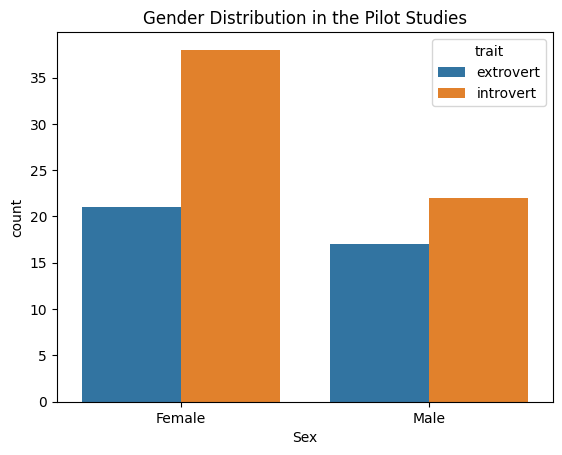

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Gender distribution in the first study 
group = pilot_1.groupby(['Sex', 'trait'])['prolific_pid'].describe().reset_index()
sns.barplot(group, x='Sex', y='count', hue='trait')
plt.title('Gender Distribution in the Pilot Studies')
plt.show()

In [3]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Filter introverts who chose either introvert or extrovert ad
introvert_choices = pilot_1[(pilot_1['trait'] == 'introvert') & 
                       (pilot_1['appeal_ad_extraversion'].isin(['low_extraversion', 'high_extraversion']))]

n_introvert_ad = (introvert_choices['appeal_ad_extraversion'] == 'low_extraversion').sum()
n_extrovert_ad = (introvert_choices['appeal_ad_extraversion'] == 'high_extraversion').sum()
n_total = n_introvert_ad + n_extrovert_ad

counts = np.array([n_introvert_ad, n_extrovert_ad])
nobs = np.array([n_total, n_total])  # Both groups from the same sample size

stat, pval = proportions_ztest(counts, nobs)
#print(f"Introverts choosing introvert ad: {n_introvert_ad}")
#print(f"Introverts choosing extrovert ad: {n_extrovert_ad}")
print(f"Introverts z-statistic: {stat:.3f}, p-value: {pval:.3f}")


# Filter extroverts who chose either introvert or extrovert ad
extrovert_choices = pilot_1[(pilot_1['trait'] == 'extrovert') & 
                       (pilot_1['appeal_ad_extraversion'].isin(['low_extraversion', 'high_extraversion']))]
n_introvert_ad_extrovert = (extrovert_choices['appeal_ad_extraversion'] == 'low_extraversion').sum()
n_extrovert_ad_extrovert = (extrovert_choices['appeal_ad_extraversion'] == 'high_extraversion').sum()
n_total_extrovert = n_introvert_ad_extrovert + n_extrovert_ad_extrovert

counts_extrovert = np.array([n_introvert_ad_extrovert, n_extrovert_ad_extrovert])
nobs_extrovert = np.array([n_total_extrovert, n_total_extrovert])  # Both groups from the same sample size

stat_extrovert, pval_extrovert = proportions_ztest(counts_extrovert, nobs_extrovert)
print(f"Extroverts z-statistic: {stat_extrovert:.3f}, p-value: {pval_extrovert:.3f}")

Introverts z-statistic: 1.031, p-value: 0.302
Extroverts z-statistic: -1.313, p-value: 0.189


## Pilot 2 

In [4]:
import pandas as pd 

books = pd.read_csv('../data/surveys/pilot_2_books.csv')
hiking = pd.read_csv('../data/surveys/pilot_2_hiking.csv')
activity_1 = pd.read_csv('../data/surveys/pilot_2_physical_activity_1.csv')
activity_2 = pd.read_csv('../data/surveys/pilot_2_physical_activity_2.csv')

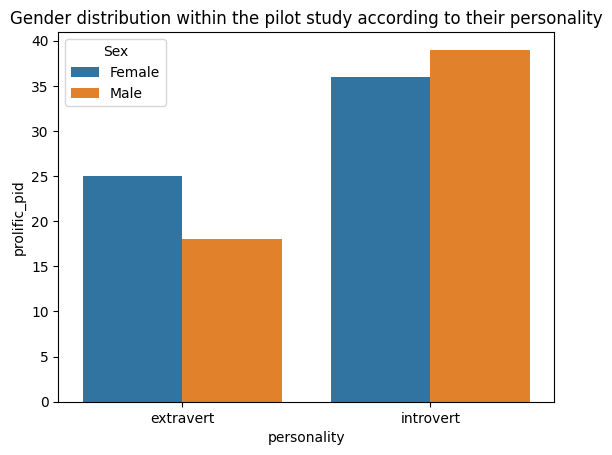

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Gender distribution in the second study 
group = books.groupby(['personality' , 'Sex'])['prolific_pid'].count().reset_index()
sns.barplot(group, x='personality', y='prolific_pid', hue='Sex')
plt.title('Gender distribution within the pilot study according to their personality');

In [7]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

def run_ztest(df, personality, choices=('introversion', 'extroversion')):
    subset = df[
        (df['personality'] == personality) &
        (df['choice'].isin(choices))
    ]
    n_introvert_ad = (subset['choice'] == 'introversion').sum()
    n_extrovert_ad = (subset['choice'] == 'extroversion').sum()
    n_total = n_introvert_ad + n_extrovert_ad
    counts = np.array([n_introvert_ad, n_extrovert_ad])
    nobs = np.array([n_total, n_total])
    stat, pval = proportions_ztest(counts, nobs)
    return stat, pval

datasets = [
    ('books', books),
    ('hiking', hiking),
    ('physical activity 1', activity_1),
    ('physical activity 2', activity_2)
]

for name, df in datasets:
    # Introverts
    stat, pval = run_ztest(df, 'introvert')
    print(f"{name} - introverts: z-statistic: {stat:.3f}, p-value: {pval:.3g}")
    # Extraverts
    stat_ext, pval_ext = run_ztest(df, 'extravert')
    print(f"{name} - extraverts: z-statistic: {stat_ext:.3f}, p-value: {pval_ext:.3g}")


books - introverts: z-statistic: 8.244, p-value: 1.66e-16
books - extraverts: z-statistic: 4.243, p-value: 2.21e-05
hiking - introverts: z-statistic: 4.526, p-value: 6.01e-06
hiking - extraverts: z-statistic: 1.000, p-value: 0.317
physical activity 1 - introverts: z-statistic: 4.527, p-value: 5.99e-06
physical activity 1 - extraverts: z-statistic: 2.216, p-value: 0.0267
physical activity 2 - introverts: z-statistic: 6.825, p-value: 8.79e-12
physical activity 2 - extraverts: z-statistic: 1.886, p-value: 0.0593


## Pilot 3

In [8]:
import pandas as pd 

design_1 = pd.read_csv('../data/surveys/pilot_3_design_1.csv')
design_2 = pd.read_csv('../data/surveys/pilot_3_design_2.csv')

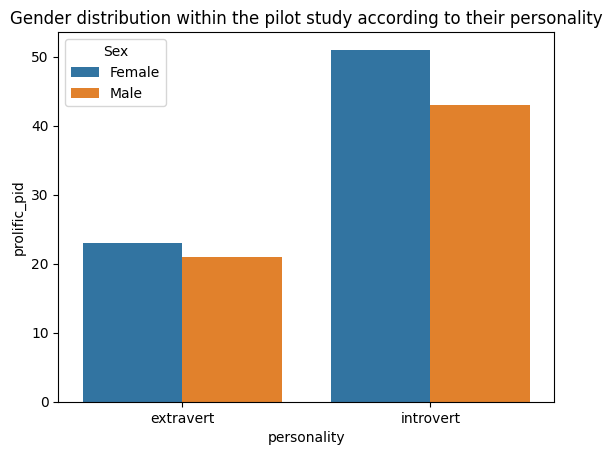

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Gender distribution in the second study 
group = design_1.groupby(['personality' , 'Sex'])['prolific_pid'].count().reset_index()
sns.barplot(group, x='personality', y='prolific_pid', hue='Sex')
plt.title('Gender distribution within the pilot study according to their personality');

In [10]:
datasets = [
    ('design 1', design_1),
    ('design 2', design_2),
]

for name, df in datasets:
    # Introverts
    stat, pval = run_ztest(df, 'introvert')
    print(f"{name} - introverts: z-statistic: {stat:.3f}, p-value: {pval:.3g}")
    # Extraverts
    stat_ext, pval_ext = run_ztest(df, 'extravert')
    print(f"{name} - extraverts: z-statistic: {stat_ext:.3f}, p-value: {pval_ext:.3g}")


design 1 - introverts: z-statistic: 3.062, p-value: 0.0022
design 1 - extraverts: z-statistic: -2.425, p-value: 0.0153
design 2 - introverts: z-statistic: 2.846, p-value: 0.00443
design 2 - extraverts: z-statistic: -1.376, p-value: 0.169
